In [12]:
import os
import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

%matplotlib inline

In [13]:
from PIL import Image

In [14]:
train_txt_sample = [
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00008-capture.jpg 37,32,53,87,0 58,30,72,63,0 62,30,90,102,0 14,41,40,110,0 29,36,47,96,0',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00046-capture.jpg 54,72,102,206,0 81,107,156,339,0 0,90,45,257,0',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00063-capture.jpg',
    '/home/gustavo/workspace/datasets/pti/PTI01/C_ED4A-04/193/18/01/08/16/54/48/00049-capture.jpg 60,79,114,225,0 21,137,123,396,0 0,108,45,288,0',
]

In [15]:
def letterbox_image(image, size, black_white=False):
    '''resize image with unchanged aspect ratio using padding'''
    iw, ih = image.size
    w, h = size
    scale = min(w/iw, h/ih)
    nw = int(iw*scale)
    nh = int(ih*scale)

    image = image.resize((nw,nh), Image.BICUBIC)
    if black_white:
        new_image = Image.new('L', size, (0))
    else:
        new_image = Image.new('RGB', size, (128,128,128))
    new_image.paste(image, ((w-nw)//2, (h-nh)//2))
    return new_image

In [16]:
def get_seg_data(annotation_line, img_shape, input_shape):
    ''' Returns the y_true matrix for the weak seg head for a specific annot image
        Parameters
        ----------
        annotation_line: string, default annotation unit
        img_shape: array-like, hw, original image dimensions
        input_shape: array-like, hw, network input shape

        Returns
        -------
        array: (h,w,2), 2 layers: one for foreground and the other for
            background information about the annotated segmentated object.
    '''


    ih,iw = img_shape
    h,w = input_shape

    fg_mask = np.zeros((ih,iw), dtype=np.uint8)
    annot = annotation_line.split(' ')
    img_path = annot[0]
    for bbox in annot[1:]:
        x_min, y_min, x_max, y_max, class_id = list(map(int, bbox.split(',')))
        fg_mask[y_min:y_max, x_min:x_max] = 1

    fg_mask = letterbox_image(Image.fromarray(fg_mask,'L'), (w,h), black_white=True)
    bg_mask = np.invert(fg_mask)

    return np.dstack((fg_mask,bg_mask))

# original image

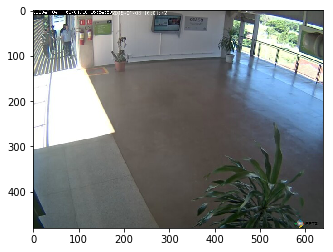

In [19]:
imgplot = plt.imshow(Image.open(train_txt_sample[0].split()[0]))

# resized image

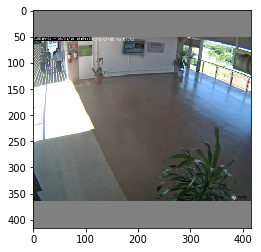

In [21]:
plt.imshow(letterbox_image(Image.open(train_txt_sample[0].split()[0]), (416,416)))

# resized to 13x13

This is the darknet backbone output dimensions. To match that layer as ground-truth we need to scale according to the output dimensions.

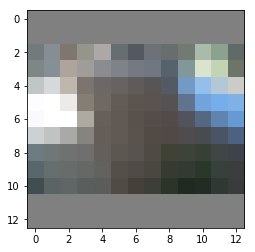

In [22]:
plt.imshow(letterbox_image(Image.open(train_txt_sample[0].split()[0]), (13,13)))

# fg and bg mask, resized (416x416)

In [23]:
y_mask = get_seg_data(train_txt_sample[0], (480,640), (416,416))
y_mask.shape

(416, 416, 2)

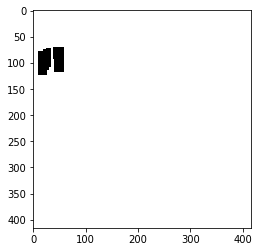

In [24]:
imgplot = plt.imshow(y_mask[:,:,0],cmap='Greys') # black is foreground

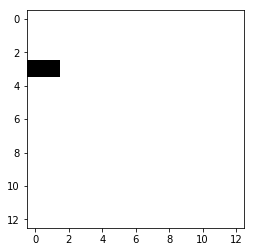

In [25]:
y_mask = get_seg_data(train_txt_sample[0], (480,640), (13,13))
imgplot = plt.imshow(y_mask[:,:,0],cmap='Greys') # black is foreground

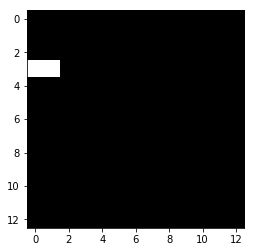

In [26]:
imgplot = plt.imshow(y_mask[:,:,1],cmap='Greys') #black is background

In [33]:
y_mask[3,0,0]

1

In [32]:
y_mask[5,0,0]

0